Exercise 1

In [56]:
# import libraries and initialize parameters

import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.sin(x)
a = 0
b = np.pi/2
print('Known value of integration of f(x)=sin(x) in given range(0, pi/2) = 1')
n = 1000

Known value of integration of f(x)=sin(x) in given range(0, pi/2) = 1


Part (a)

In [57]:
# declare the function
f = lambda x: np.sin(x)

# defining the functions for the rules

# Composite Midpoint Rule
def midpoint(f, a, b, n):
    h = (b - a)/n
    result = 0
    for i in range(1,n):
        result += f(h/2 + i*h) * h
    return result

# Composite Trapezoidal Rule
def trapezoidal(f, a, b, n):
    h = (b - a)/n
    result = f(a)*h/2 + f(b)*h/2
    for i in range(n):
        result += f(i*h) * h
    return result

# Composite Trapezoidal Rule with wrong parameters at the extreme ends
def wrong_trapezoidal(f, a, b, n):
    h = (b - a)/n
    result = f(a)*h + f(b)*h # wrong parameters here
    for i in range(1,n):
        result += f(i*h) * h
    return result

# Composite Simpson rule
def simpson(f, a, b, n):
    h = (b - a)/n
    xi_0 = f(a) + f(b)
    xi_odd = 0
    xi_even = 0
    for i in range(n):
        if i%2 == 0:
            xi_even += f(i*h)
        else:
            xi_odd += f(i*h)
    xI = (xi_0 + 2*xi_even + 4*xi_odd)*h/3 
    return xI


print("Value using Composite Midpoint Rule:", midpoint(f, a, b, n))
print("Value using Composite Trapezoidal Rule:", trapezoidal(f, a, b, n))
print("Value using Composite Simpson Rule:", simpson(f, a, b, n))

Value using Composite Midpoint Rule: 0.9999988691079635
Value using Composite Trapezoidal Rule: 0.9999997943832337
Value using Composite Simpson Rule: 1.000000000000034


Part (b)

Convergence for Composite Midpoint Rule =  1.99999950938828
Convergence for Composite Trapezoidal Rule: =  2.000000166426986
Convergence for Composite Simpson Rule =  3.9857606332167435
Convergence for Wrong Composite Trapezoidal Rule: =  0.9996310139804283



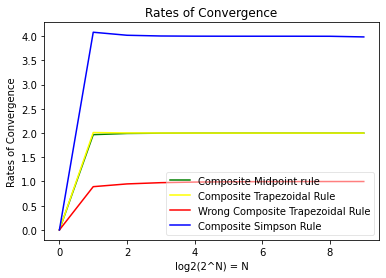

In [58]:
# declaring parameters for the plot

max = 10
h = [0]*max
count = [0]*max
rate_midpoint = [0]*max
rate_trapezoidal = [0]*max
rate_wrong_trapezoidal = [0]*max
rate_simpson = [0]*max
val = [0]*max

for i in range(1,max):
    count[i] = i
    val[i] = 1 * pow(2,i)
    h[i] = (b-a)/(i)
    rate_midpoint[i] += np.log2((1-midpoint(f, a, b, val[i]))/(1-midpoint(f, a, b, val[i]*2)))
    rate_trapezoidal[i] += np.log2((1-trapezoidal(f, a, b, val[i]))/(1-trapezoidal(f, a, b, val[i]*2)))
    rate_wrong_trapezoidal[i] += np.log2((1-wrong_trapezoidal(f, a, b, val[i]))/(1-wrong_trapezoidal(f, a, b, val[i]*2)))
    rate_simpson[i] += np.log2((1-simpson(f, a, b, val[i]))/(1-simpson(f, a, b, val[i]*2)))
    

print("Convergence for Composite Midpoint Rule = ", rate_midpoint[-1])
print("Convergence for Composite Trapezoidal Rule: = ", rate_trapezoidal[-1])
print("Convergence for Composite Simpson Rule = ", rate_simpson[-1])
print("Convergence for Wrong Composite Trapezoidal Rule: = ", rate_wrong_trapezoidal[-1])
print()

# plotting the convergence rate of the functions
plt.plot(count, rate_midpoint, 'green',)
plt.plot(count, rate_trapezoidal, 'yellow')
plt.plot(count, rate_wrong_trapezoidal, 'red')
plt.plot(count, rate_simpson, 'blue')
plt.xlabel("log2(2^N) = N")
plt.ylabel("Rates of Convergence")
plt.title("Rates of Convergence")
plt.legend(["Composite Midpoint rule", "Composite Trapezoidal Rule", "Wrong Composite Trapezoidal Rule",
            "Composite Simpson Rule"], loc=4, fancybox=True, framealpha=0.5)
plt.show() #loglog plot


Exercise 2

In [63]:
# declaring the given function and the parameters

f = lambda x: x - np.power(x,3)
y0 = 0.1 # initial condition
T = 1
N = 1000
t = 1
a = y0/np.sqrt(y0**2 - (y0**2-1)*np.exp(-2*t))
print('Known solution of the given ODE with the initial parameters = ', a)
# defining simple iteration method for calculating the approximation of Backward Euler and Crank Nicolson methods
def iteration_method(f, x0, eps):
    while(abs(f(x0)-x0) > eps):
        x0 = f(x0)
    return x0

Known solution of the given ODE with the initial parameters =  0.2635396737805913


Part (a)

In [64]:
# Euler method
def euler_method(f, y0, T, N):
    h = T/N
    f0 = f(y0)
    y0 = y0 + (h*f0)
    yt = y0
    for i in range(2, N + 1):
        f_t = f(yt)
        yt = yt + (h*f_t)
    return yt

# Backward Euler or Implicit Euler method
def backward_euler(f, y0, T, N):
    h = T/N
    for i in range(0, N):
        g = lambda x: y0 + h*(f(x))
        y0 = iteration_method(g, y0, 1e-15)
    return y0

# Crank Nicolson method
def crank_nicolson(f, y0, T, N):
    h = T/(N-1)
    for i in range(0, N-1):
        g = lambda x: y0 + (h/2)*(f(y0)) + (h/2)*(f(x))
        y0 = iteration_method(g, y0, 1e-10)
    return y0

print("Euler Method result: ", euler_method(f, y0, T, N))
print("Backward Euler Result: ", backward_euler(f, y0, T, N))
print("Crank Nicolson Result: ", crank_nicolson(f, y0, T, N))


Euler Method result:  0.2634285240102893
Backward Euler Result:  0.26365097798305975
Crank Nicolson Result:  0.263539636354036


Part (b)

In [65]:
# calculating the convergence rates for Euler, Backward Euler and Crank Nicolson methods

print("Convergence Rate of Euler Method: ", np.log2(abs(a - euler_method(f, y0, T, N))/ abs(a - euler_method(f, y0, T, 2*N))))
print("Convergence Rate of Backward Euler Method: ", np.log2(abs(a - backward_euler(f, y0, T, N))/abs(a - backward_euler(f, y0, T, 2*N))))
print("Convergence Rate Crank Nicolson Method: ", np.log2(abs(a - crank_nicolson(f, y0, T, N))/abs(a - crank_nicolson(f, y0, T, 2*N))))

Convergence Rate of Euler Method:  0.9994994110740735
Convergence Rate of Backward Euler Method:  1.000500959253812
Convergence Rate Crank Nicolson Method:  2.0009043910353967
